In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, Dense, MaxPooling2D,Input, Flatten

In [5]:
brain_dataset = keras.preprocessing.image_dataset_from_directory(
    './brain_tumor_dataset',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 253 files belonging to 2 classes.


In [7]:
class_names = brain_dataset.class_names
class_names

['no', 'yes']

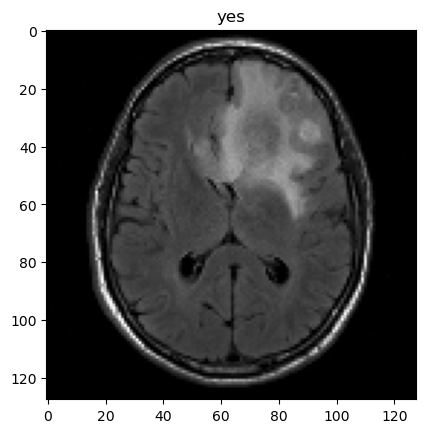

In [11]:
for image_batch, label_batch in brain_dataset.take(1):
  plt.imshow(image_batch[1].numpy().astype("uint8"))
  plt.title(class_names[label_batch[1]])

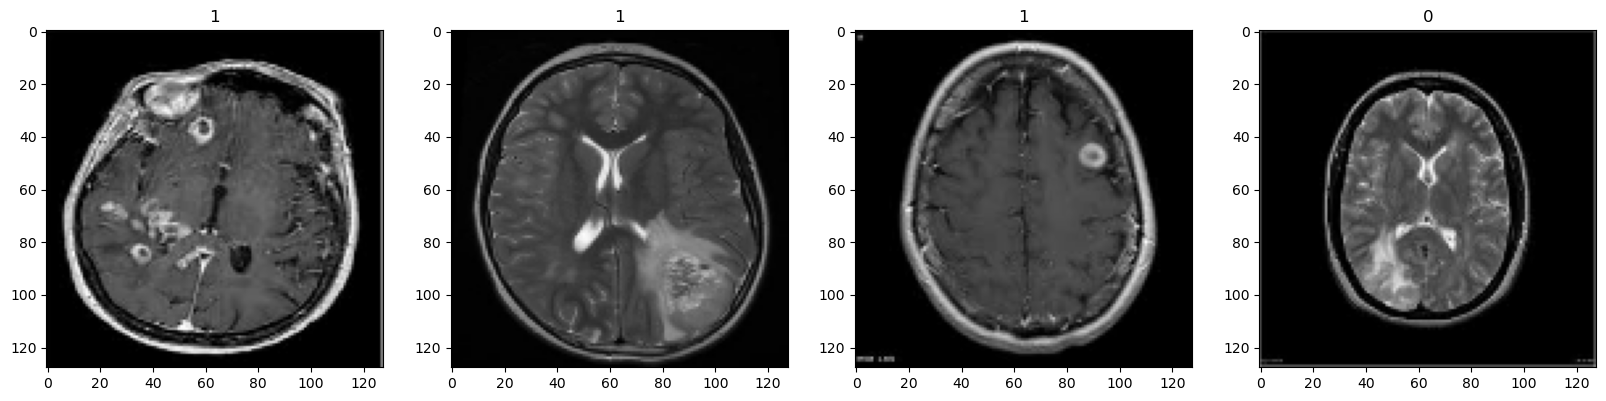

In [15]:
data_iterator = brain_dataset.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
len(brain_dataset)

8

In [25]:
train_size = int(len(brain_dataset)*0.7)
test_size = int(len(brain_dataset)*0.1) +1
val_size = int(len(brain_dataset)*0.2) +1
print(train_size, test_size, val_size)

5 1 2


In [29]:
train = brain_dataset.take(train_size)
val = brain_dataset.skip(train_size).take(val_size)
test = brain_dataset.skip(train_size+val_size).take(test_size)

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Model

In [80]:
model = keras.models.Sequential([
    layers.Conv2D(32, (3,3), 1, activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,225 (2.40 MB)

 Trainable params: 628,225 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy,
    metrics=['accuracy']
)

In [84]:
history = model.fit(
    train,
    epochs=20,
    validation_data=val
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step - accuracy: 0.4654 - loss: 22.0245 - val_accuracy: 0.6094 - val_loss: 4.4028
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.6134 - loss: 2.8955 - val_accuracy: 0.7969 - val_loss: 0.5254
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.7871 - loss: 0.6881 - val_accuracy: 0.7656 - val_loss: 0.5577
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.7293 - loss: 0.6281 - val_accuracy: 0.7656 - val_loss: 0.4745
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.7681 - loss: 0.4725 - val_accuracy: 0.7969 - val_loss: 0.4740
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.8165 - loss: 0.4244 - val_accuracy: 0.7344 - val_loss: 0.4617
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.8384 - loss: 0.4229 - val_accuracy: 0.8281 - val_loss: 0.3828
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.8629 - loss: 0.3908 - val_accuracy: 0.8125 - val_loss

plot results

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

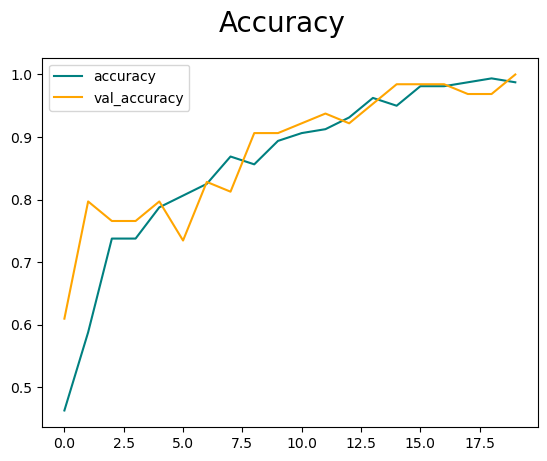

In [86]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

make prediction

In [56]:
import cv2

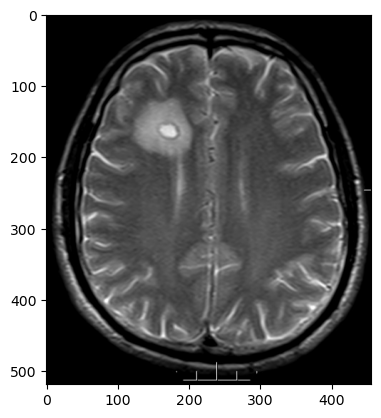

In [72]:
img = cv2.imread('./brain_tumor_dataset/yes/Y3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

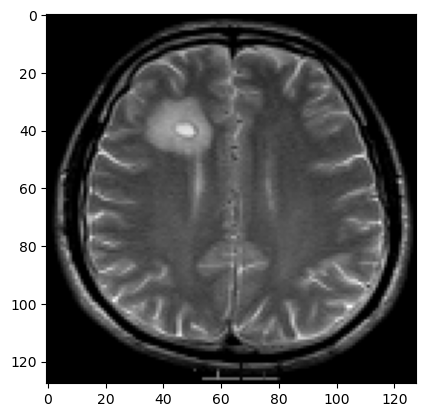

In [74]:
#resize the image from 450 to 128px
resize = tf.image.resize(img, (128,128)) 
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [62]:
resize.shape

TensorShape([128, 128, 3])

In [66]:
print(np.expand_dims(resize, 0).shape)

(1, 128, 128, 3)


In [76]:
#expand the shape of the input array
prediction = model.predict(np.expand_dims(resize, 0))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.9470335]], dtype=float32)

In [78]:
if prediction >0.5:
  print("tumor detected")
else:
  print("no tumor detected")

tumor detected
